In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("white")
import math
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from DBSCAN import MyDBSCAN
from KMeans import MyKMeans
from sklearn.cluster import DBSCAN

In [2]:
# Function for creating datapoints in the form of a circle
np.random.seed(42)

def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

X = df.values
print(X.shape)

(2300, 2)


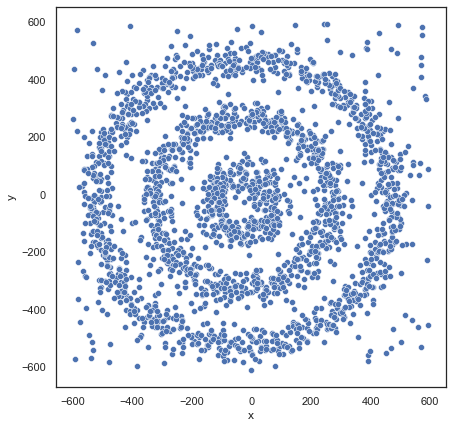

In [3]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
dbscan = MyDBSCAN(eps=30, min_samples=6)
dbscan.fit(X)

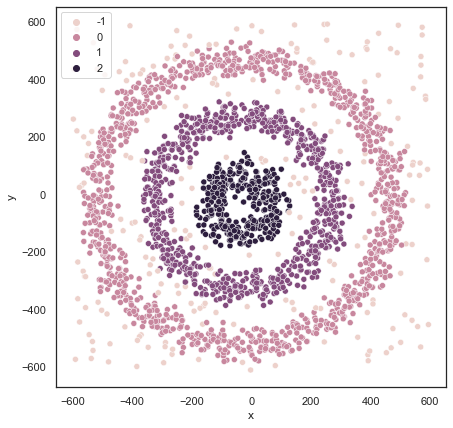

In [5]:
sns.scatterplot(X[:,0], X[:, 1], hue=dbscan.labels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
sk_dbscan = DBSCAN(eps=30,min_samples=6)
sk_dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

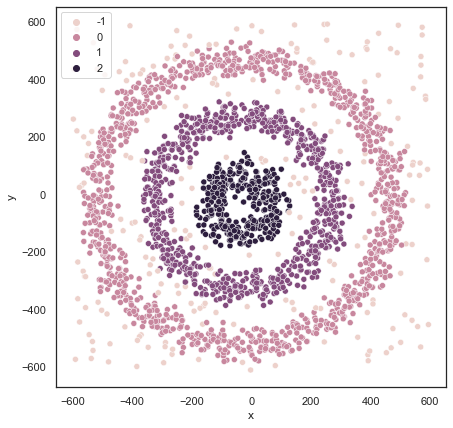

In [7]:
sns.scatterplot(X[:,0], X[:, 1], hue = sk_dbscan.labels_)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
df['scikit_DBSCAN']=sk_dbscan.labels_
df['scikit_DBSCAN'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: scikit_DBSCAN, dtype: int64

In [14]:
df['MyDBSCAN'] = dbscan.labels
df['MyDBSCAN'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: MyDBSCAN, dtype: int64

In [ ]:
kmeans = MyKMeans()
kmeans.fit(X, 4)
centroids, clusters = kmeans.centroids, kmeans.clusters

In [ ]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters)
sns.scatterplot(centroids[:,0], centroids[:,1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()